In [156]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import scipy as sp
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

import warnings
warnings.simplefilter("ignore")
plt.style.use('fivethirtyeight')

In [2]:
def filter_dunder(any_obj):
    temp_list = dir(any_obj)
    date_obj_meth_attr = []
    for i in temp_list:
        if i[0:2] != '__':
            date_obj_meth_attr.append(i)
    date_obj_meth_attr = {'meth_attr':date_obj_meth_attr}
    return pd.DataFrame(date_obj_meth_attr)

In [3]:
time_stamp = pd.Timestamp(dt.datetime(2021,12,25))

In [4]:
filter_dunder(time_stamp)

,meth_attr
0,_date_repr
1,_repr_base
2,_round
3,_short_repr
4,_time_repr
...,...
75,value
76,week
77,weekday
78,weekofyear


In [5]:
print(time_stamp.year)
print(time_stamp.month)
print(time_stamp.day)
print(time_stamp.day_name())

2021
12
25
Saturday


In [6]:
print(time_stamp)

2021-12-25 00:00:00


In [7]:
period = pd.Period('2021-8'); period

Period('2021-08', 'M')

In [8]:
period_2 = pd.Period('2021-8-28', 'D'); period_2

Period('2021-08-28', 'D')

In [9]:
print(period + 2)

2021-10


In [10]:
print(period_2 - 10)

2021-08-18


## Sequence of Time

Each object in the ```date_range``` is a ```Timestamp``` object.

In [11]:
index = pd.date_range(start = '2010-12', end = '2021-12', freq = 'M')
index

DatetimeIndex(['2010-12-31', '2011-01-31', '2011-02-28', '2011-03-31',
               '2011-04-30', '2011-05-31', '2011-06-30', '2011-07-31',
               '2011-08-31', '2011-09-30',
               ...
               '2021-02-28', '2021-03-31', '2021-04-30', '2021-05-31',
               '2021-06-30', '2021-07-31', '2021-08-31', '2021-09-30',
               '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', length=132, freq='M')

In [12]:
index.to_period()

PeriodIndex(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05',
             '2011-06', '2011-07', '2011-08', '2011-09',
             ...
             '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07',
             '2021-08', '2021-09', '2021-10', '2021-11'],
            dtype='period[M]', length=132, freq='M')

In [13]:
index_2 = pd.date_range(start= '2021-12-1', periods = 10)
for day in index_2:
    print(str(day.day) + ':' + day.day_name())

1:Wednesday
2:Thursday
3:Friday
4:Saturday
5:Sunday
6:Monday
7:Tuesday
8:Wednesday
9:Thursday
10:Friday


In [14]:
index_2

DatetimeIndex(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10'],
              dtype='datetime64[ns]', freq='D')

## Create a Time Series

In [15]:
time_series = pd.DataFrame({'Time':index})

In [16]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    132 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB


In [17]:
data = np.random.randn(len(index), 2)

In [18]:
time_series = pd.DataFrame(data = data, index = index, columns =['Series_1', 'Series_2'])

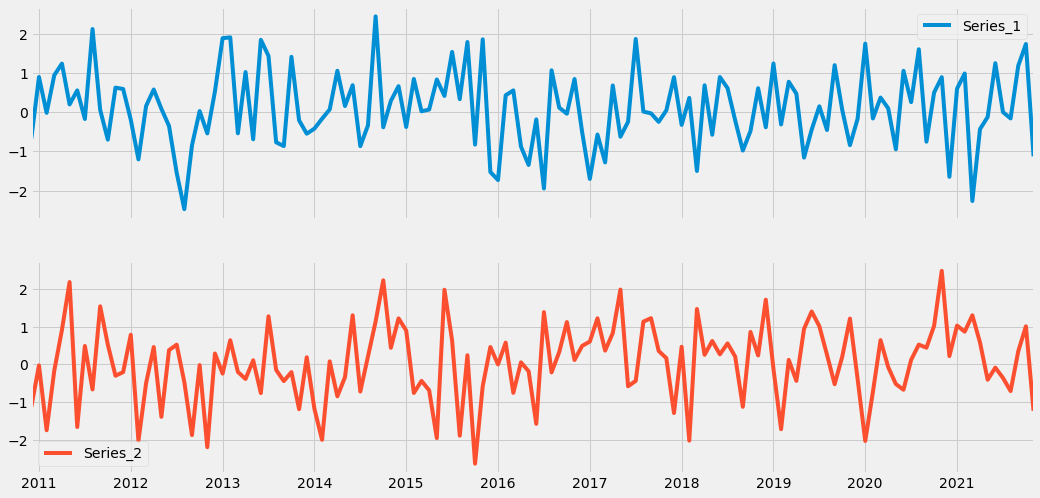

In [19]:
time_series.plot(figsize=(16, 8), subplots=True); plt.show()

In [20]:
tesla_stockp = pdr.data.DataReader(name = 'TSLA', data_source = 'yahoo', start = '2018-1-1', end = '2021-12-1')

In [21]:
tesla_stockp.head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
2018-01-09,67.760002,65.480003,67.031998,66.737999,35733000.0,66.737999
2018-01-10,67.400002,66.000000,66.440002,66.959999,21549500.0,66.959999
2018-01-11,68.961998,66.652000,67.047997,67.589996,33227500.0,67.589996
2018-01-12,68.082001,66.734001,67.725998,67.244003,24125500.0,67.244003


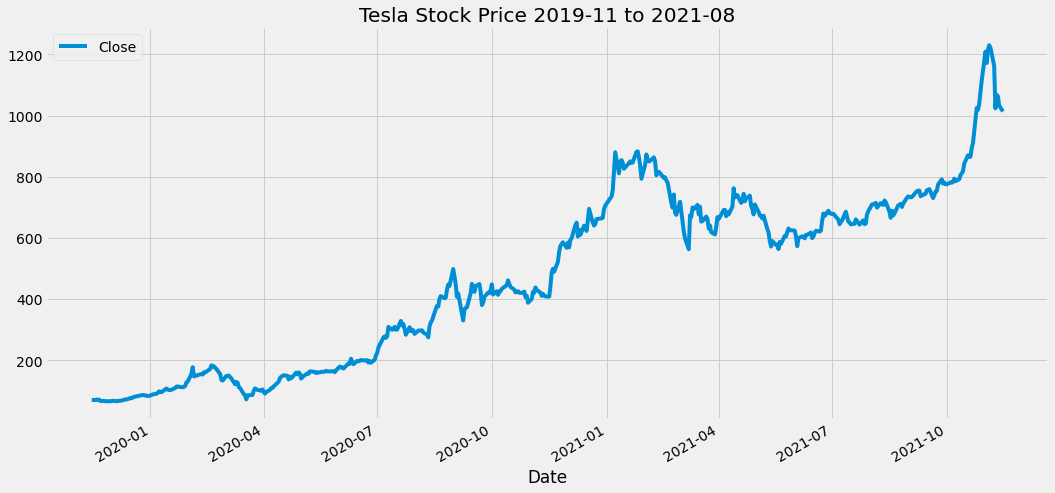

In [22]:
tesla_stockp.loc['2019-11-15':'2021-11-15', ['Close']].plot(figsize=(16, 8), 
                                                            title = 'Tesla Stock Price 2019-11 to 2021-08'); plt.show()

Upsampling to including non-trade days, such as weekends.

In [23]:
tesla_stockp.asfreq('D').head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002
2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998
2018-01-09,67.760002,65.480003,67.031998,66.737999,35733000.0,66.737999
2018-01-10,67.400002,66.000000,66.440002,66.959999,21549500.0,66.959999


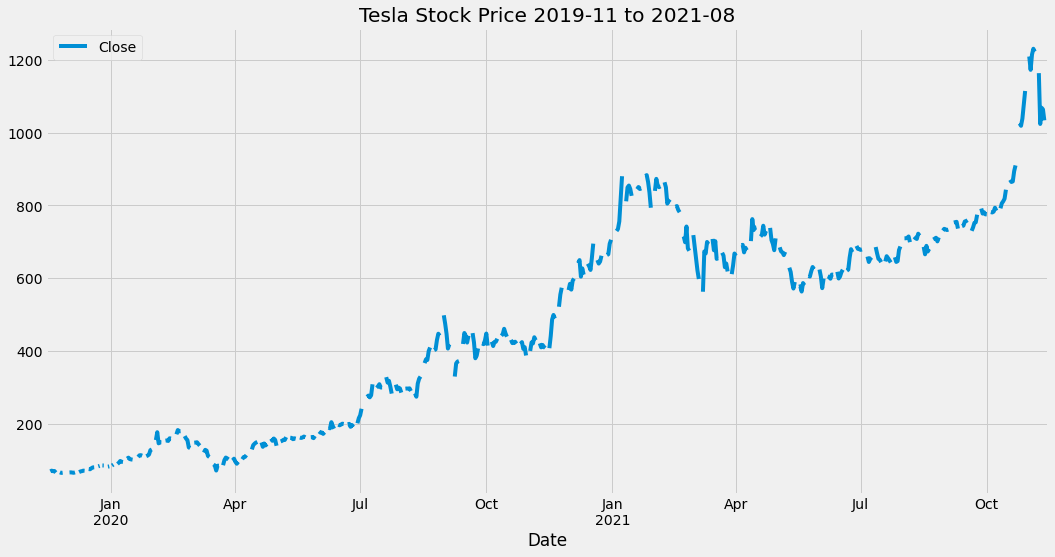

In [24]:
tesla_stockp.asfreq('D').loc['2019-11-15':'2021-11-15', ['Close']].plot(figsize=(16, 8), 
                                                            title = 'Tesla Stock Price 2019-11 to 2021-08'); plt.show()

## Compare Each Years Data

In [25]:
tesla_prices = pd.DataFrame()
for year in ['2018', '2019', '2020', '2021']:
    price_per_year = tesla_stockp.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close':year+' close'}, inplace=True)
    tesla_prices = pd.concat([tesla_prices, price_per_year], axis=1)
    
tesla_prices.head()

,2018 close,2019 close,2020 close,2021 close
0,64.106003,62.023998,86.052002,729.770020
1,63.450001,60.071999,88.601997,735.109985
2,62.924000,63.537998,90.307999,755.979980
3,63.316002,66.991997,93.811996,816.039978
4,67.281998,67.070000,98.428001,880.020020


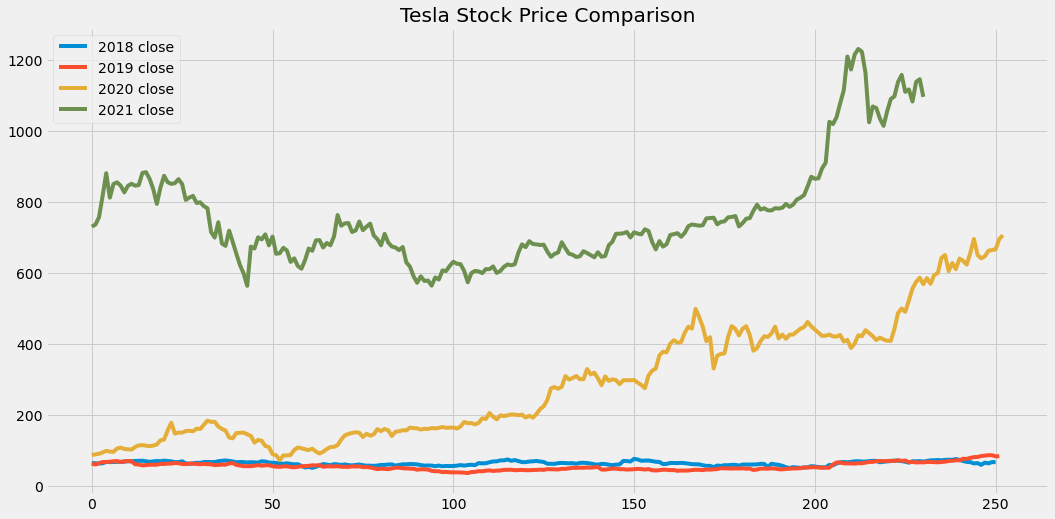

In [26]:
tesla_prices.plot(figsize=(16, 8), title ='Tesla Stock Price Comparison'); plt.show()

## Resampling

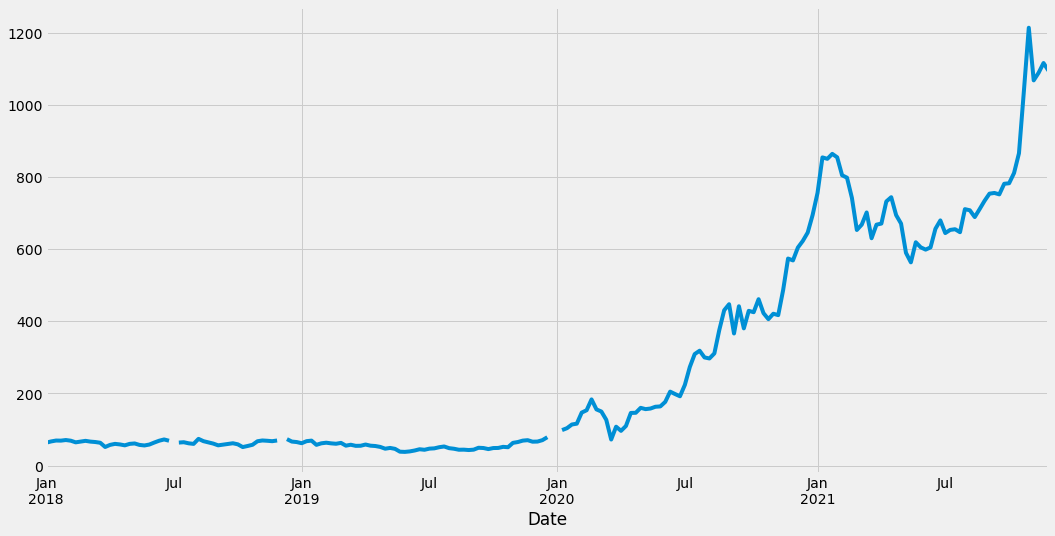

In [27]:
tesla_stockp['Close'].asfreq('W-Wed').plot(figsize = (16, 8)); plt.show()

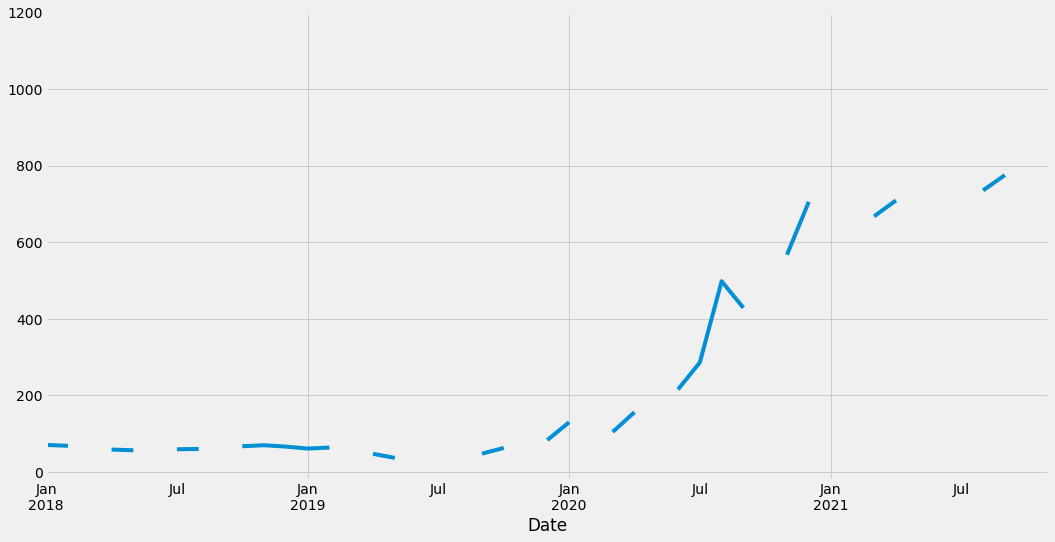

In [28]:
tesla_stockp['Close'].asfreq('M').plot(figsize = (16, 8)); plt.show()

## Lagged Variable

In [29]:
tesla_stockp['Lag_1'] = tesla_stockp['Close'].shift()
tesla_stockp['Daily Change'] = tesla_stockp['Close'].div(tesla_stockp['Lag_1'])

In [30]:
tesla_stockp.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_1,Daily Change
Date,,,,,,,,
2018-01-02,64.421997,62.200001,62.400002,64.106003,21761000.0,64.106003,NaN,NaN
2018-01-03,65.050003,63.110001,64.199997,63.450001,22607500.0,63.450001,64.106003,0.989767
2018-01-04,63.709999,61.136002,62.574001,62.924000,49731500.0,62.924000,63.450001,0.991710
2018-01-05,63.448002,62.400002,63.324001,63.316002,22956000.0,63.316002,62.924000,1.006230
2018-01-08,67.403999,63.099998,63.200001,67.281998,49297000.0,67.281998,63.316002,1.062638


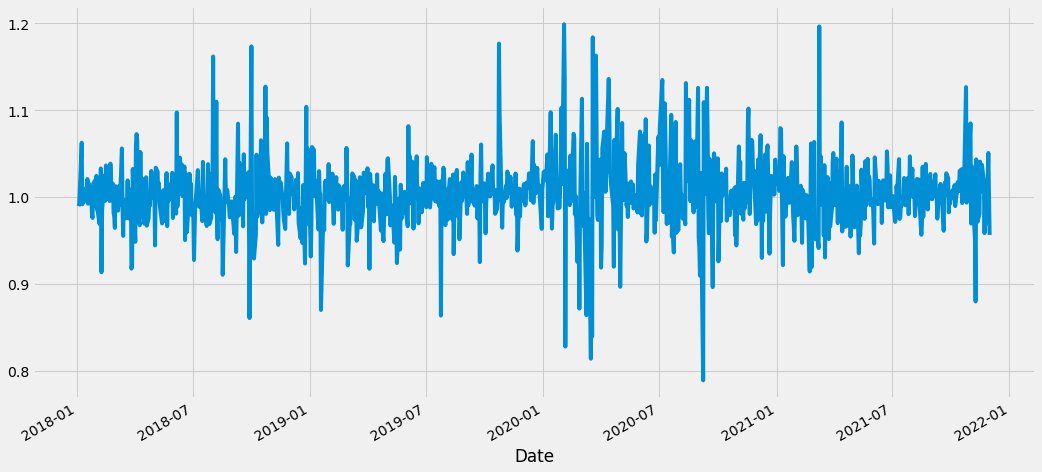

In [31]:
tesla_stockp['Daily Change'].plot(figsize = (16, 8)); plt.show()

## Growth Rate

In [32]:
tesla_stockp['change_pct'] = tesla_stockp['Close'].pct_change()

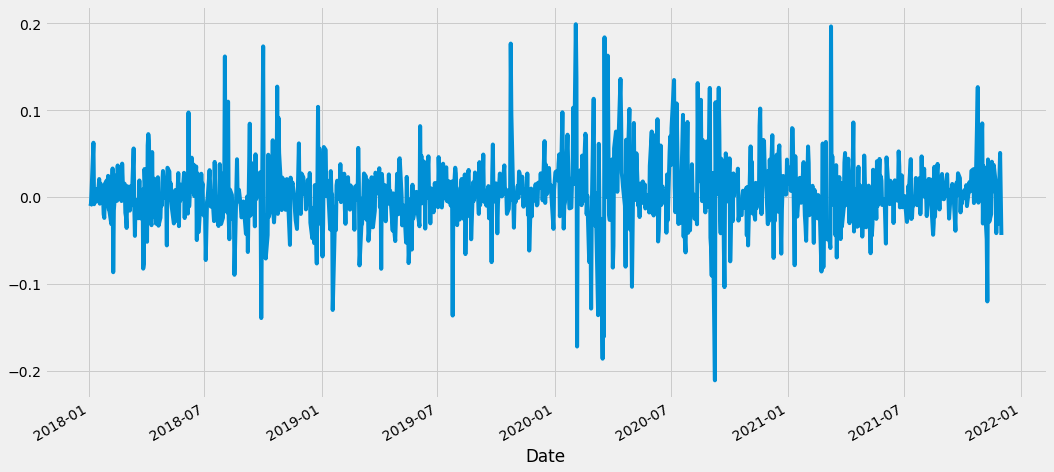

In [33]:
tesla_stockp['change_pct'].plot(figsize = (16, 8)); plt.show()

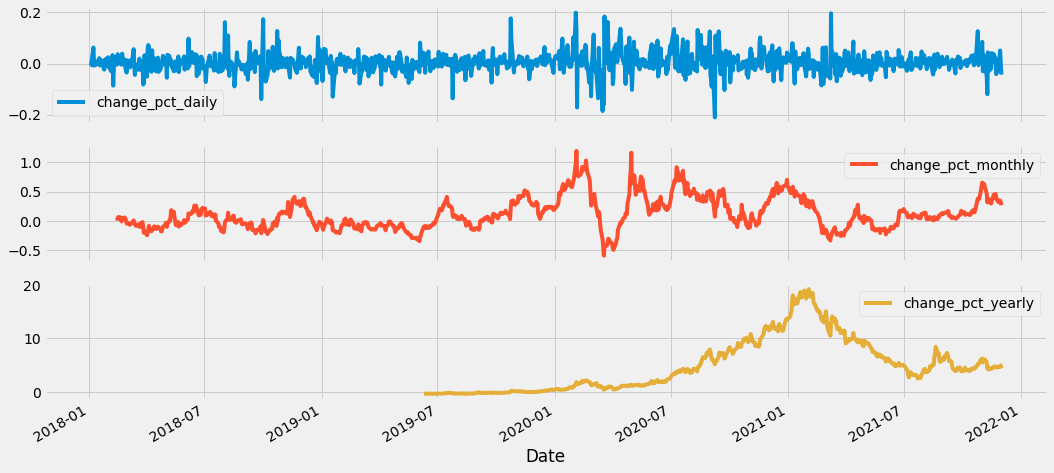

In [34]:
tesla_stockp['change_pct_daily'] = tesla_stockp['Close'].pct_change()
tesla_stockp['change_pct_monthly'] = tesla_stockp['Close'].pct_change(periods=30)
tesla_stockp['change_pct_yearly'] = tesla_stockp['Close'].pct_change(periods=360)
tesla_stockp[['change_pct_daily', 'change_pct_monthly', 'change_pct_yearly']]\
.plot(subplots=True, figsize = (16, 8)); plt.show()

In [35]:
# SP500, Gold, Crude oil, Gold, Bitcoin, Nikkei 225
assets_tickers =  ['^GSPC', 'GC=F', 'CL=F', 'BTC-USD', '^N225']
legends = ['SP500', 'Gold', 'Crude oil', 'Gold', 'Bitcoin', 'Nikkei 225']
start_date = '2010-1-1'
end_date = '2021-12-1'
assets_price = pdr.data.DataReader(name = assets_tickers, data_source = 'yahoo', start = start_date, end = end_date)

In [36]:
normalized_prices = assets_price['Close'].div(assets_price['Close'].iloc[0]).mul(100)

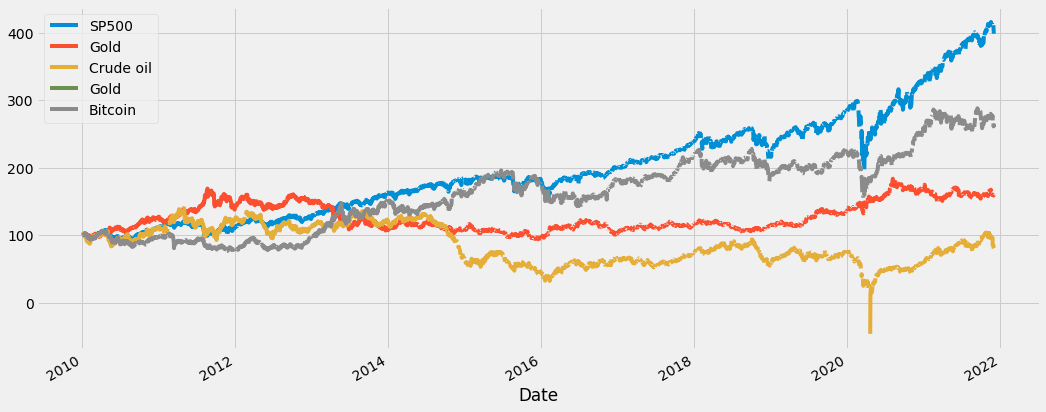

In [37]:
price_plot = normalized_prices.plot(figsize = (16, 7))
price_plot.legend(legends)
plt.show()

## Correlation

In [38]:
assets_close = assets_price['Close']
assets_close.columns = ['SP500', 'Crude oil', 'Gold', 'Bitcoin', 'Nikkei 225']

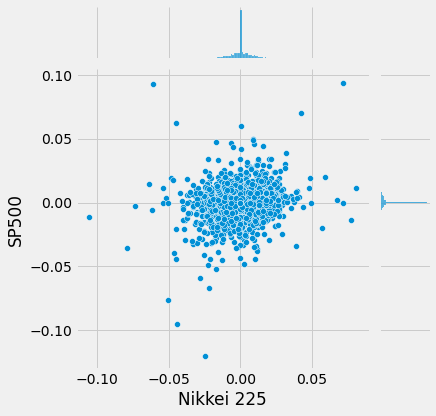

In [39]:
sns.jointplot(x='Nikkei 225', y='SP500', data=assets_close.pct_change()); plt.show()

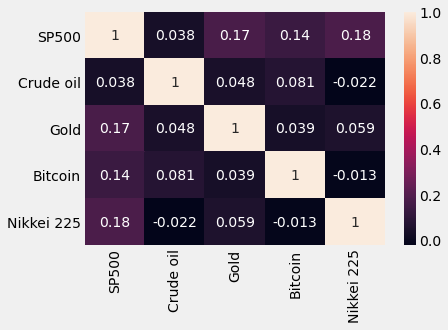

In [40]:
assets_corr = assets_close.pct_change().corr()
sns.heatmap(assets_corr, annot=True); plt.show()

## Normalization

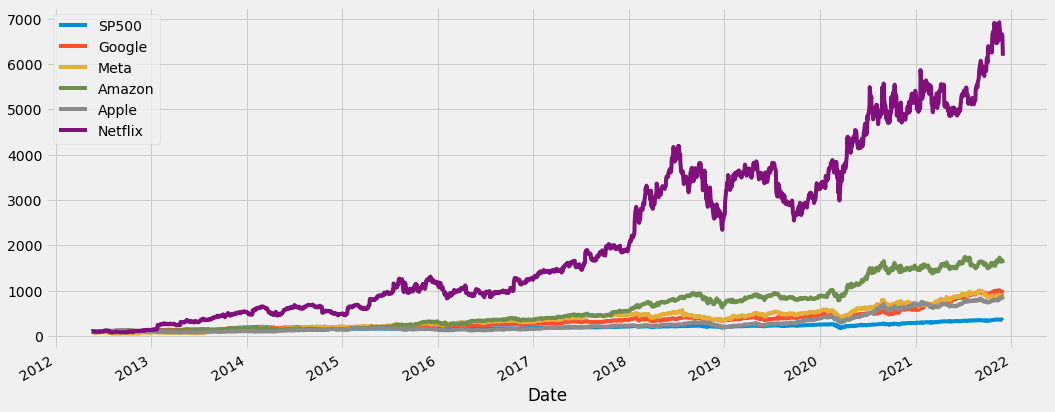

In [41]:
assets_tickers =  ['^GSPC', 'GOOG', 'FB', 'AMZN', 'AAPL', 'NFLX']
legends = ['SP500', 'Google', 'Meta', 'Amazon', 'Apple', 'Netflix']
start_date = '2010-1-1'
end_date = '2021-12-1'
assets_price = pdr.data.DataReader(name = assets_tickers, data_source = 'yahoo', start = start_date, end = end_date).dropna()

price_plot = assets_price['Close'].div(assets_price['Close'].iloc[0]).mul(100).plot(figsize = (16, 7), grid = True)
price_plot.legend(legends)
plt.show()

Make them start from $0$.

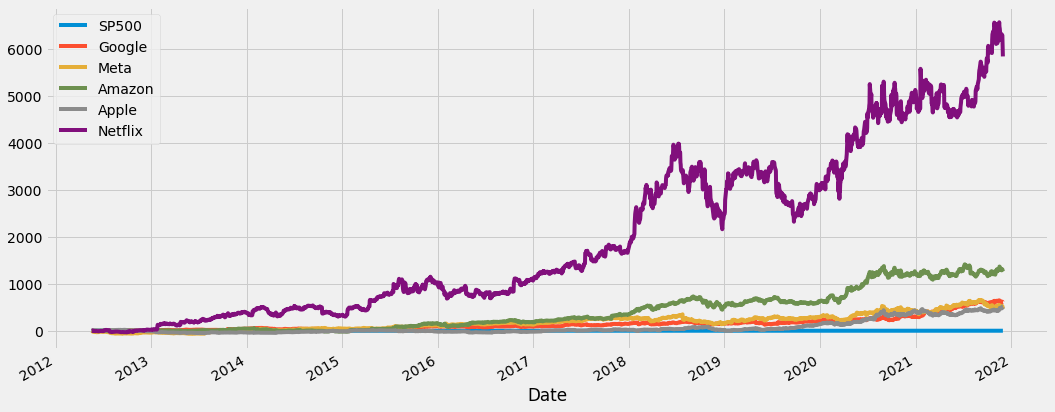

In [42]:
normalized = assets_price['Close'].div(assets_price['Close'].iloc[0]).mul(100)

price_plot = normalized[assets_tickers].sub(normalized['^GSPC'], axis = 0).plot(figsize = (16, 7), grid = True)
price_plot.legend(legends)
plt.show()

## Changing Data Frequency

In [43]:
start = '2021-1-15'
end = '2021-12-20'
dates = pd.date_range(start = start, end = end, freq='M')
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30'],
              dtype='datetime64[ns]', freq='M')

In [44]:
monthly = pd.Series(data = np.arange(len(dates)), index = dates); monthly

2021-01-31     0
2021-02-28     1
2021-03-31     2
2021-04-30     3
2021-05-31     4
2021-06-30     5
2021-07-31     6
2021-08-31     7
2021-09-30     8
2021-10-31     9
2021-11-30    10
Freq: M, dtype: int32

In [45]:
weekly_dates = pd.date_range(start = start, end = end, freq='W'); weekly_dates

DatetimeIndex(['2021-01-17', '2021-01-24', '2021-01-31', '2021-02-07',
               '2021-02-14', '2021-02-21', '2021-02-28', '2021-03-07',
               '2021-03-14', '2021-03-21', '2021-03-28', '2021-04-04',
               '2021-04-11', '2021-04-18', '2021-04-25', '2021-05-02',
               '2021-05-09', '2021-05-16', '2021-05-23', '2021-05-30',
               '2021-06-06', '2021-06-13', '2021-06-20', '2021-06-27',
               '2021-07-04', '2021-07-11', '2021-07-18', '2021-07-25',
               '2021-08-01', '2021-08-08', '2021-08-15', '2021-08-22',
               '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-19',
               '2021-09-26', '2021-10-03', '2021-10-10', '2021-10-17',
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14',
               '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12',
               '2021-12-19'],
              dtype='datetime64[ns]', freq='W-SUN')

Conform the data with new index. ```bfill``` and ```ffill``` mean fill backward and forward.

In [46]:
monthly.reindex(weekly_dates).head(10)

2021-01-17    NaN
2021-01-24    NaN
2021-01-31    0.0
2021-02-07    NaN
2021-02-14    NaN
2021-02-21    NaN
2021-02-28    1.0
2021-03-07    NaN
2021-03-14    NaN
2021-03-21    NaN
Freq: W-SUN, dtype: float64

In [47]:
monthly.reindex(weekly_dates, method = 'bfill').head(10)

2021-01-17    0.0
2021-01-24    0.0
2021-01-31    0.0
2021-02-07    1.0
2021-02-14    1.0
2021-02-21    1.0
2021-02-28    1.0
2021-03-07    2.0
2021-03-14    2.0
2021-03-21    2.0
Freq: W-SUN, dtype: float64

In [48]:
monthly.reindex(weekly_dates, method = 'ffill').head(10)

2021-01-17    NaN
2021-01-24    NaN
2021-01-31    0.0
2021-02-07    0.0
2021-02-14    0.0
2021-02-21    0.0
2021-02-28    1.0
2021-03-07    1.0
2021-03-14    1.0
2021-03-21    1.0
Freq: W-SUN, dtype: float64

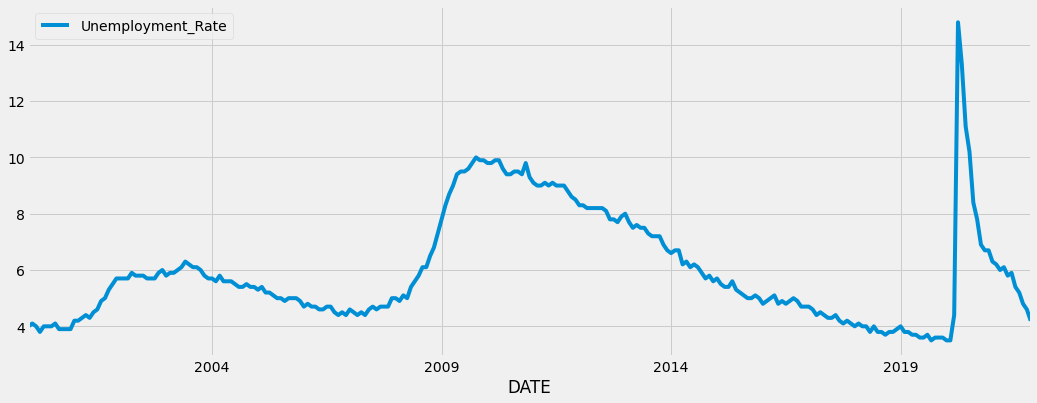

In [49]:
df_unempl = pdr.data.DataReader(name='UNRATE', data_source='fred', start = '2000-1-1', end = dt.date.today())
df_unempl.columns = ['Unemployment_Rate']
df_unempl.plot(figsize=(16, 6))
plt.show()

In [50]:
df_unempl.head()

,Unemployment_Rate
DATE,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


Change the frequency to weekly data, the missing values will be filled by existing values.

In [51]:
df_unempl_bfill = df_unempl.asfreq('W', method='bfill')
df_unempl_ffill = df_unempl.asfreq('W', method='ffill')
df_unempl_concat = pd.concat([df_unempl_bfill, df_unempl_ffill], axis=1)
df_unempl_concat.columns =['unemp_rate_bfilled_weekly', 'unemp_rate_ffilled_weekly']

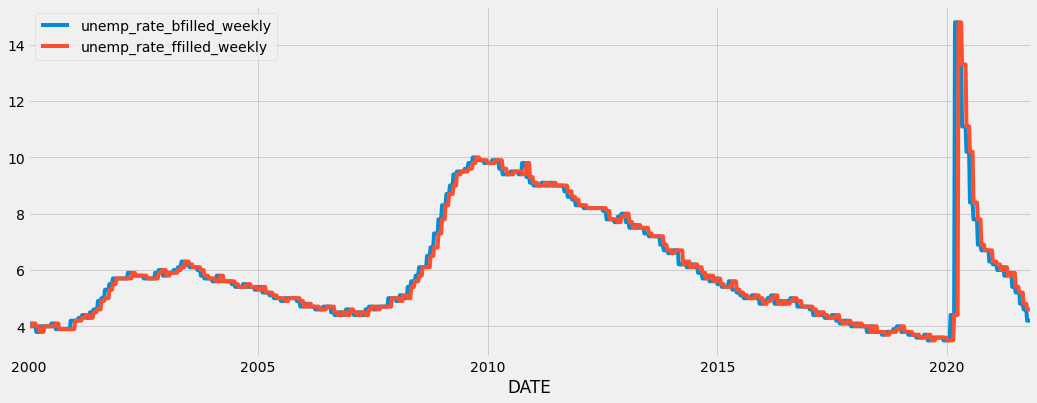

In [52]:
df_unempl_concat.plot(figsize=(16, 6)); plt.show()

## Interpolation

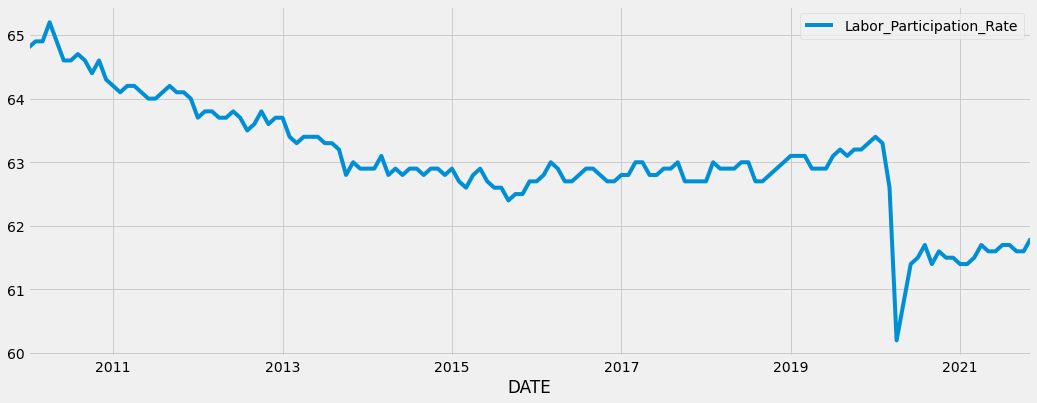

In [53]:
lab_part = pdr.data.DataReader(name='CIVPART', data_source='fred', start = '2010-1-1', end = dt.date.today())
lab_part.columns = ['Labor_Participation_Rate']
lab_part.plot(figsize=(16, 6))
plt.show()

In [54]:
daily_dates = pd.date_range(start=lab_part.index.min(), end=lab_part.index.max(), freq='D')

In [55]:
lab_part_daily = lab_part.reindex(daily_dates)
lab_part_daily['forward_fill'] = lab_part_daily['Labor_Participation_Rate'].ffill()
lab_part_daily['interpolation'] = lab_part_daily['Labor_Participation_Rate'].interpolate() # this is exactly the plot above

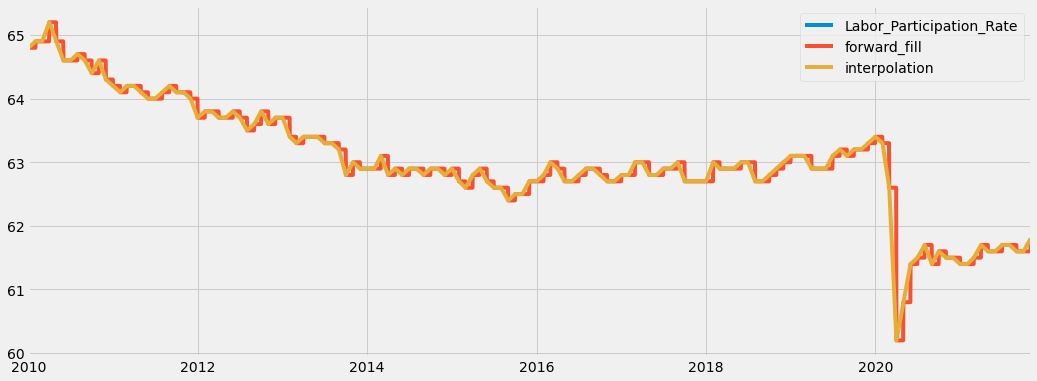

In [56]:
lab_part_daily.plot(figsize=(16, 6)); plt.show()

In [57]:
df = pdr.data.DataReader(name=['DFII10','GOLDAMGBD228NLBM'], data_source='fred', start = '2010-1-1', end = dt.date.today())

In [58]:
df.columns = ['10y_TB_yield','Gold_Fix_London_10AM']

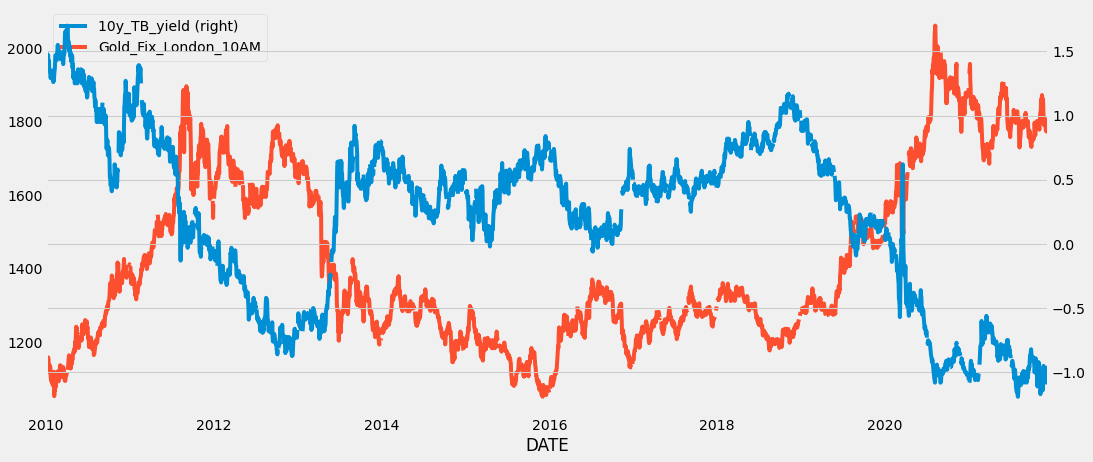

In [59]:
ax = df.plot(secondary_y = '10y_TB_yield', figsize =(16, 7))
plt.show()

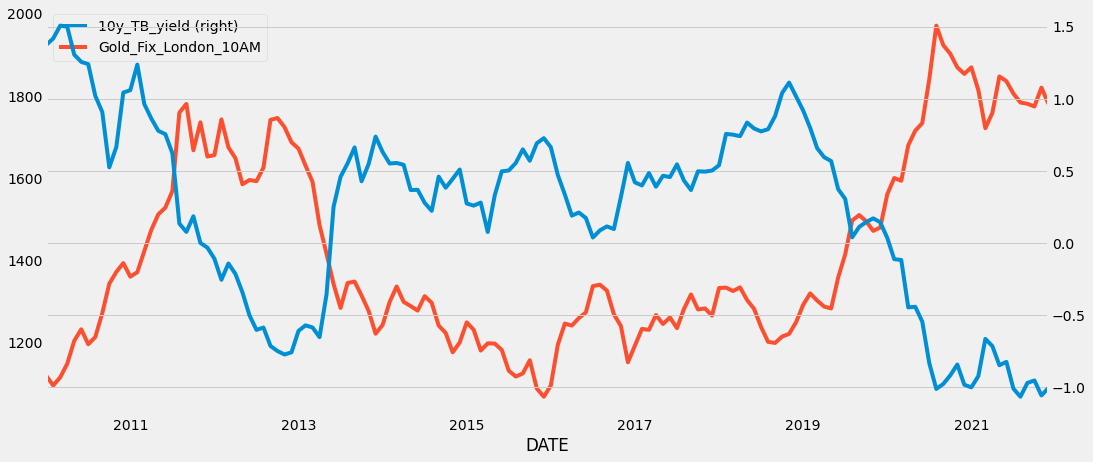

In [60]:
ax = df.resample('M').mean().plot(secondary_y = '10y_TB_yield', figsize =(16, 7))
plt.show()

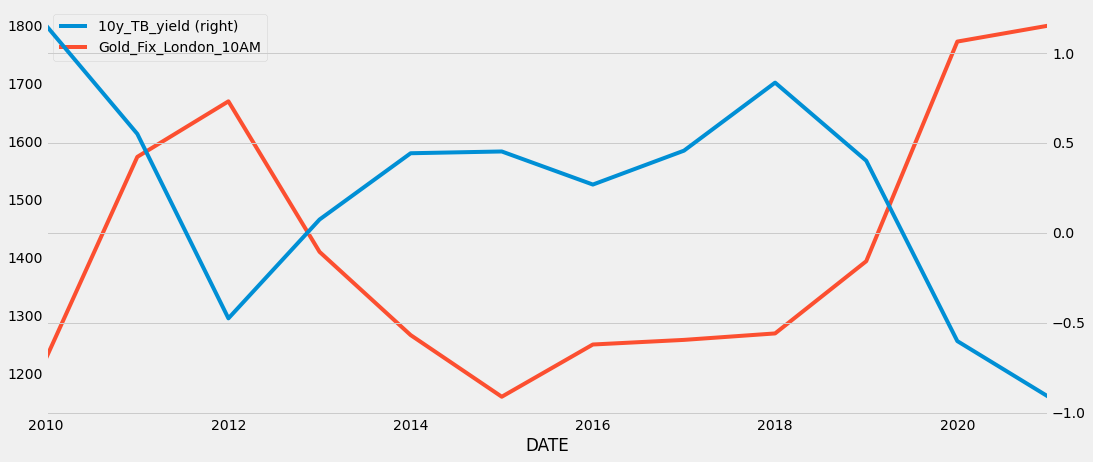

In [61]:
ax = df.resample('A').mean().plot(secondary_y = '10y_TB_yield', figsize =(16, 7))
plt.show()

In [62]:
df.resample('M').first().head()

,10y_TB_yield,Gold_Fix_London_10AM
DATE,,
2010-01-31,1.47,1113.00
2010-02-28,1.29,1082.00
2010-03-31,1.46,1117.25
2010-04-30,1.61,1116.00
2010-05-31,1.32,1184.25


In [63]:
df.resample('M').last().head()

,10y_TB_yield,Gold_Fix_London_10AM
DATE,,
2010-01-31,1.30,1082.75
2010-02-28,1.48,1112.50
2010-03-31,1.60,1109.50
2010-04-30,1.29,1175.25
2010-05-31,1.32,1214.00


## Conform the Frequency Among Time Series

In [64]:
data_list = ['GDPC1', 'SP500', 'U2RATE']
df = pdr.data.DataReader(name=data_list, data_source='fred', start = '2010-1-1', end = '2020-1-1')

In [65]:
df.columns = ['realGDP', 'SP500', 'unempRate']

In [66]:
sp500_chrate_quarterly = df['SP500'].resample('QS').first().pct_change()
unempRate_quarterly = df['unempRate'].resample('QS').first().pct_change()
gdp_chrate = df['realGDP'].dropna().pct_change()

In [67]:
df_quarterly = pd.concat([gdp_chrate, sp500_chrate_quarterly, unempRate_quarterly], axis=1)

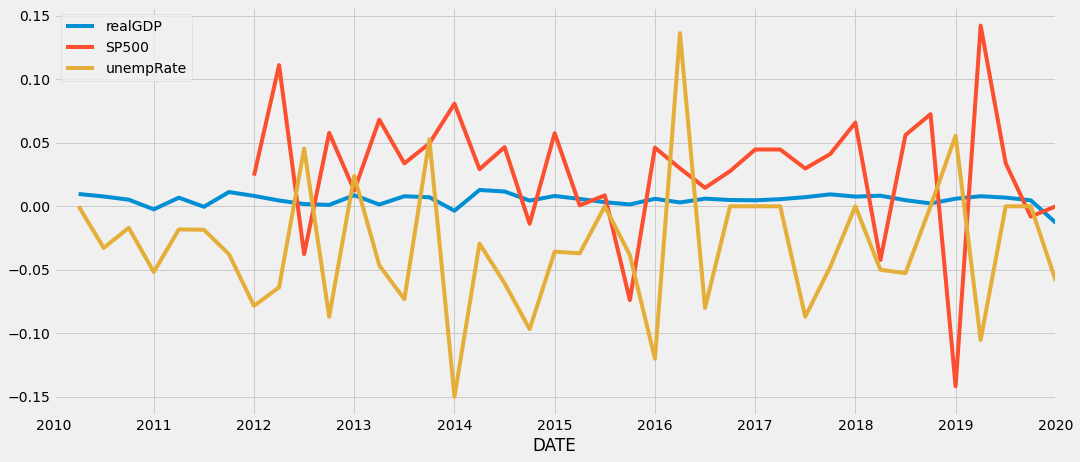

In [68]:
df_quarterly.plot(figsize=(16, 7)); plt.show()

## Apply Multiple Function

In [69]:
nk225 = pdr.data.DataReader(name='NIKKEI225', data_source='fred', start = '2000-1-1', end = dt.datetime.today())

In [70]:
nk225_daily_return = nk225.pct_change()

In [71]:
nk225_stats = nk225_daily_return.resample('W').agg(['mean', 'median', 'std'])

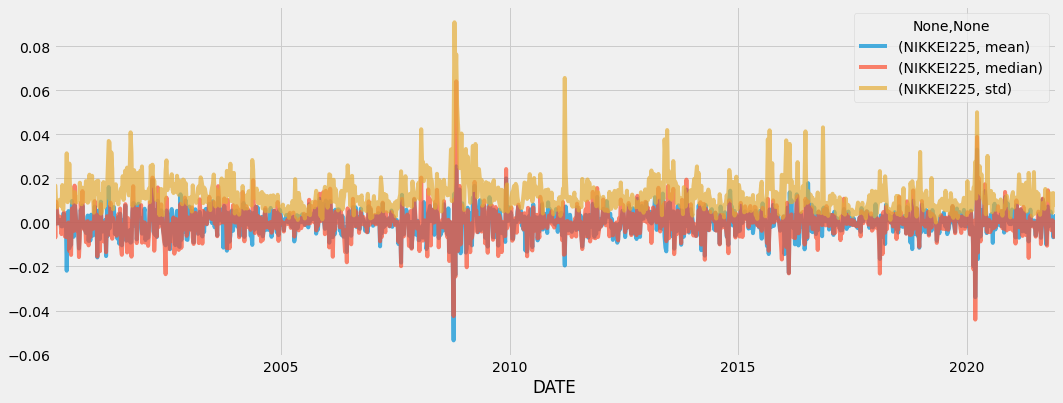

In [72]:
nk225_stats.plot(figsize=(16, 6), alpha=.7); plt.show()

## Rolling Window

In [73]:
start_date = '2010-1-1'
end_date = '2021-12-1'
usdjpy = pdr.data.DataReader(name = 'DEXJPUS', data_source = 'fred', start = start_date, end = end_date).dropna()

In [74]:
usdjpy['30D'] = usdjpy['DEXJPUS'].rolling(window='30D').mean()
usdjpy['60D'] = usdjpy['DEXJPUS'].rolling(window='60D').mean()
usdjpy['120D'] = usdjpy['DEXJPUS'].rolling(window='120D').mean()

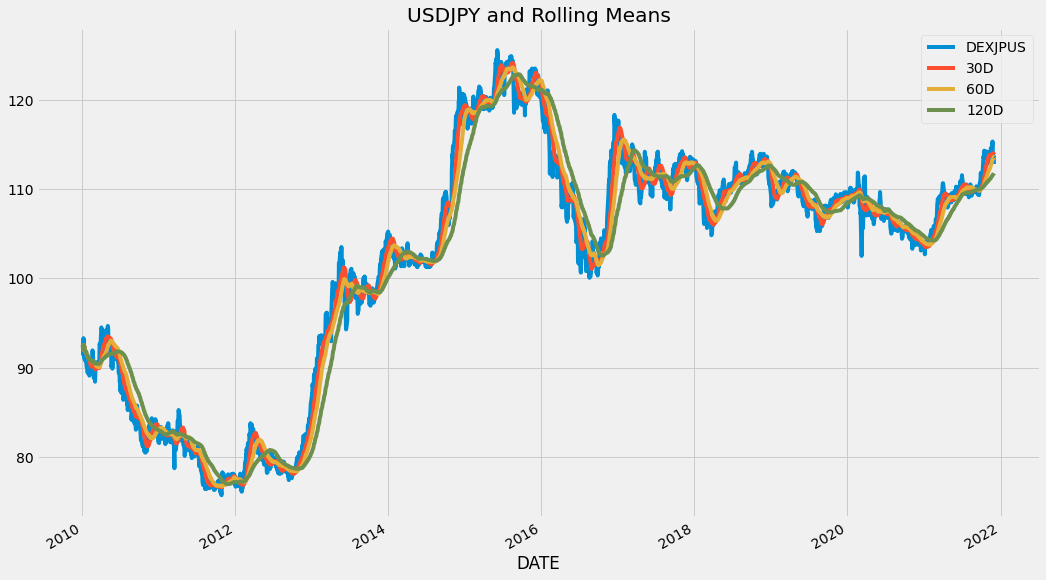

In [75]:
usdjpy.plot(figsize=(16, 10), grid=True, title = 'USDJPY and Rolling Means'); plt.show()

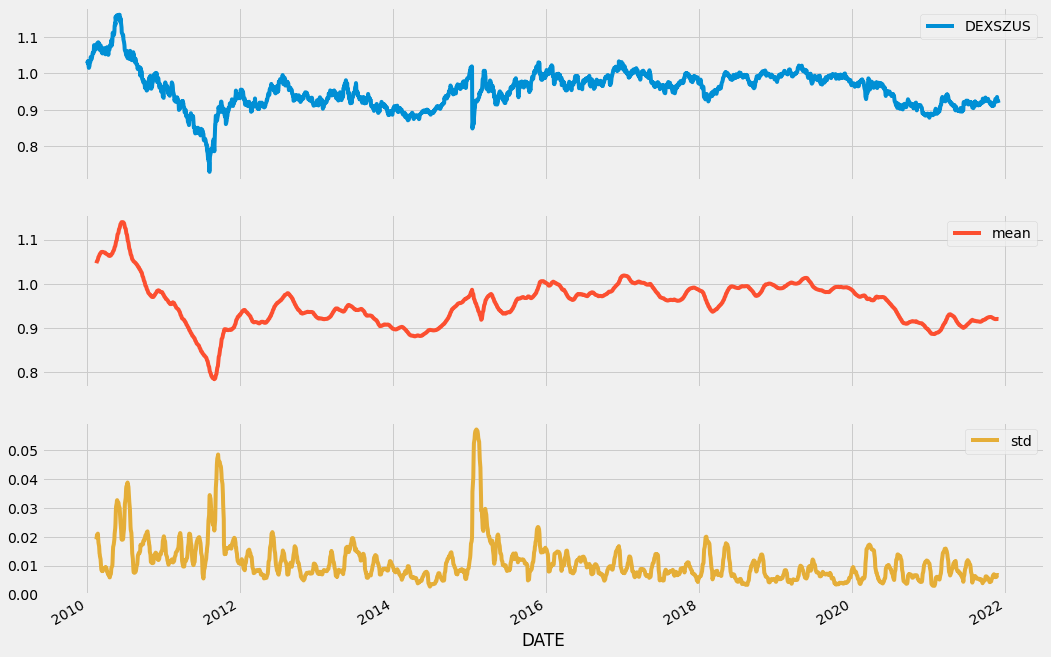

In [76]:
usdchf = pdr.data.DataReader(name = 'DEXSZUS', data_source = 'fred', start = start_date, end = end_date).dropna()
rolling_stats = usdchf['DEXSZUS'].rolling(window=30).agg(['mean', 'std']).dropna()
usdchf = usdchf.join(rolling_stats)
usdchf.plot(subplots=True, figsize=(16, 12), grid=True); plt.show()

## Rolling Window With Upper And Lower Bound

In [107]:
usdjpy['mstd'] = usdjpy['DEXJPUS'].rolling(window=120).std()
usdjpy['ma'] = usdjpy['DEXJPUS'].rolling(window=120).mean()
usdjpy['upper'] = usdjpy['ma'] + usdjpy['mstd']*2
usdjpy['lower'] = usdjpy['ma'] - usdjpy['mstd']*2

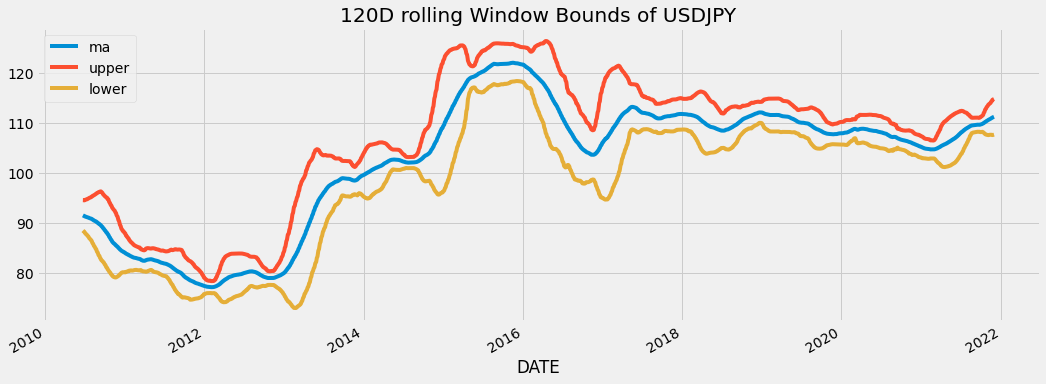

In [114]:
usdjpy.iloc[:, 5:8].plot(figsize=(16, 6), title='120D rolling Window Bounds of USDJPY'); plt.show()

## Rolling Quantile

In [77]:
dxy = pdr.data.DataReader(name = 'DTWEXBGS', data_source = 'fred', start = start_date, end = end_date).dropna()
dxy.columns = ['DXY']
dxy_rolling = dxy['DXY'].rolling(window=30)

dxy['q10'] = dxy_rolling.quantile(.1)
dxy['q50'] = dxy_rolling.quantile(.5)
dxy['q90'] = dxy_rolling.quantile(.9)

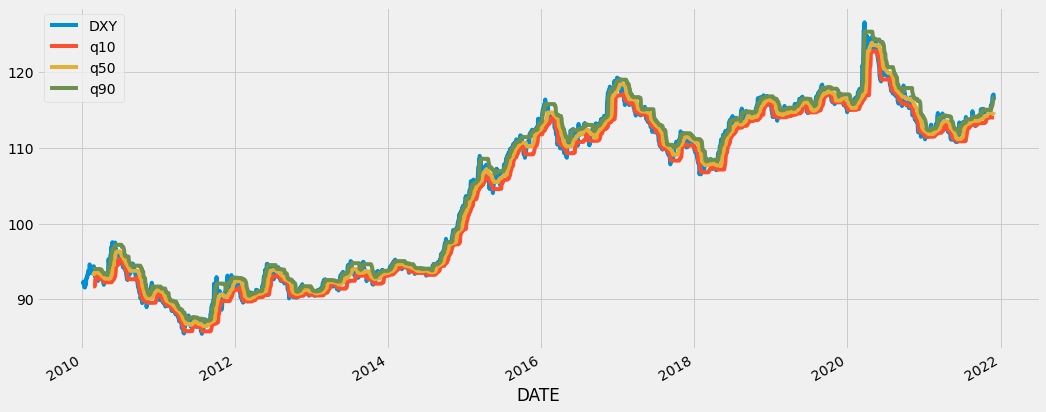

In [78]:
dxy.plot(grid=True, figsize=(16, 7)); plt.show()

## Cumulative Sum

The cumulative summation is the opposite operation of first order difference, but don't do this, they will produce different results.

In [79]:
sp500 = pdr.data.DataReader(name='SP500', data_source='fred', start = '2010-1-1', end = dt.datetime.today())

In [80]:
sp500_diff = sp500.diff().dropna()

In [81]:
first_day = sp500.first('D')
cumulative = first_day.append(sp500_diff).cumsum()

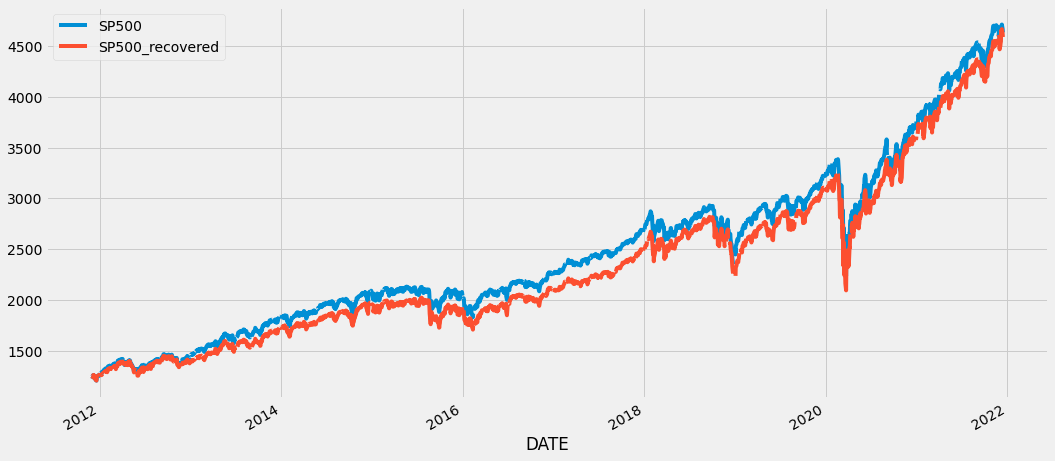

In [82]:
sp500.join(cumulative.add_suffix('_recovered')).plot(figsize=(16, 8), grid=True);plt.show()

## Cumulative Return

In [83]:
init_investment = 50000

Retrieve Lululemon's closing price.

In [84]:
lulu = pdr.data.DataReader(name='LULU', data_source='yahoo', start = '2010-1-1', end = dt.datetime.today())['Close'].to_frame()

In [85]:
lulu_cum_ret = lulu.pct_change().add(1).cumprod()

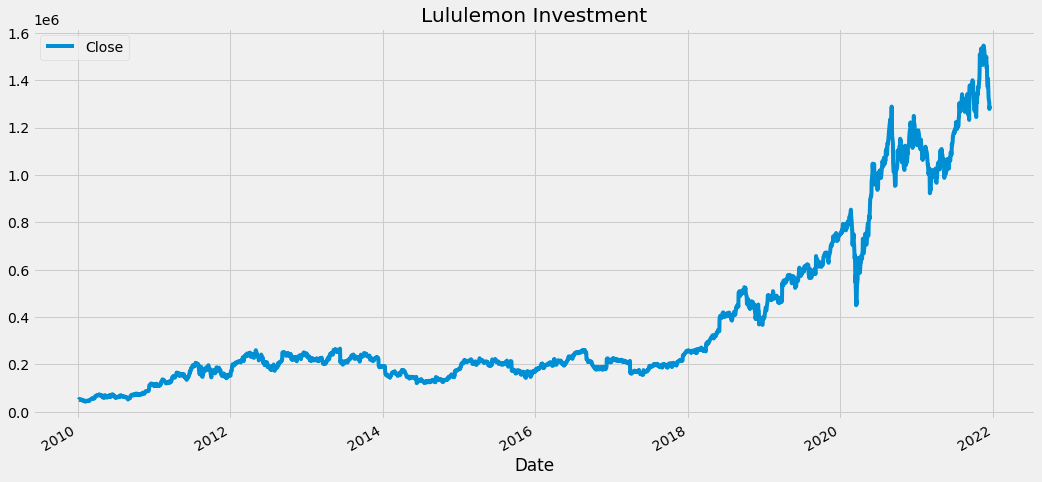

In [86]:
(init_investment*lulu_cum_ret).plot(figsize=(16, 8), grid=True, title='Lululemon Investment');plt.show()

In [87]:
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [88]:
# Lululemon, Nike, Adidas, Under Armour, Anta
stocks_list = ['LULU', 'NKE', 'ADS.F', 'UA', 'AS7.F']
stocks = pdr.data.DataReader(name=stocks_list, data_source='yahoo', start = '2017-1-1', end = dt.datetime.today())['Close']
stocks.columns = ['Lululemon', 'Nike', 'Adidas', 'Under Armour', 'Anta']

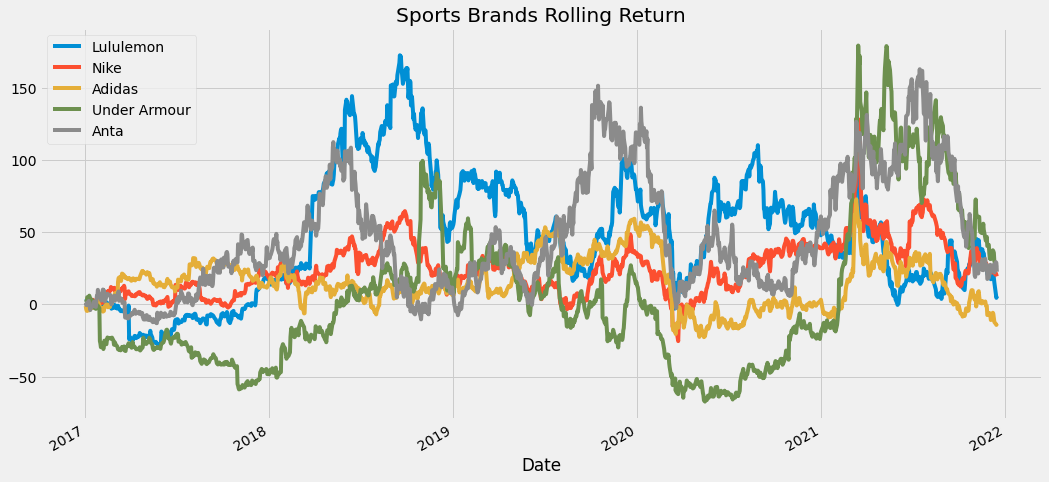

In [89]:
stocks.pct_change().rolling(window='360D')\
.apply(multi_period_return).mul(100).plot(figsize=(16, 8), grid=True, title='Sports Brands Rolling Return')
plt.show()

## Simulating Stocks Growth

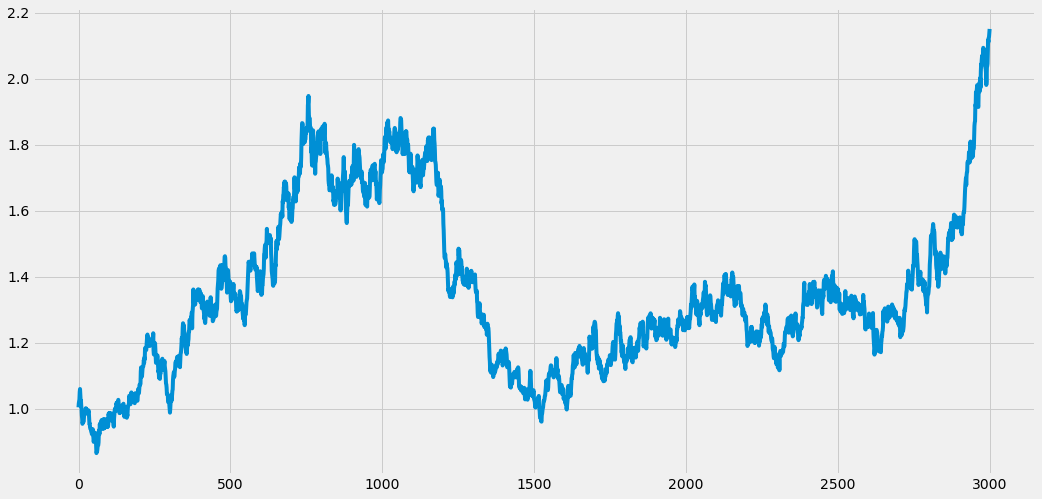

In [90]:
rand_walk = pd.Series(sp.stats.norm.rvs(loc = .0005, scale = .012, size = 3000))
(1 + rand_walk).cumprod().plot(figsize=(16, 8), grid=True);plt.show()

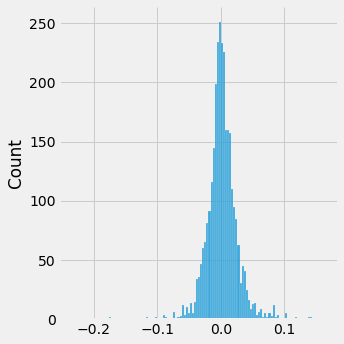

In [91]:
lulu = pdr.data.DataReader(name='LULU', data_source='yahoo', start = '2010-1-1', end = dt.datetime.today())['Close'].to_frame()
daily_lulu = lulu.pct_change().dropna()
lulu_simu = pd.Series(np.random.choice(daily_lulu.values.flatten(), len(daily_lulu)))
sns.displot(lulu_simu); plt.show()

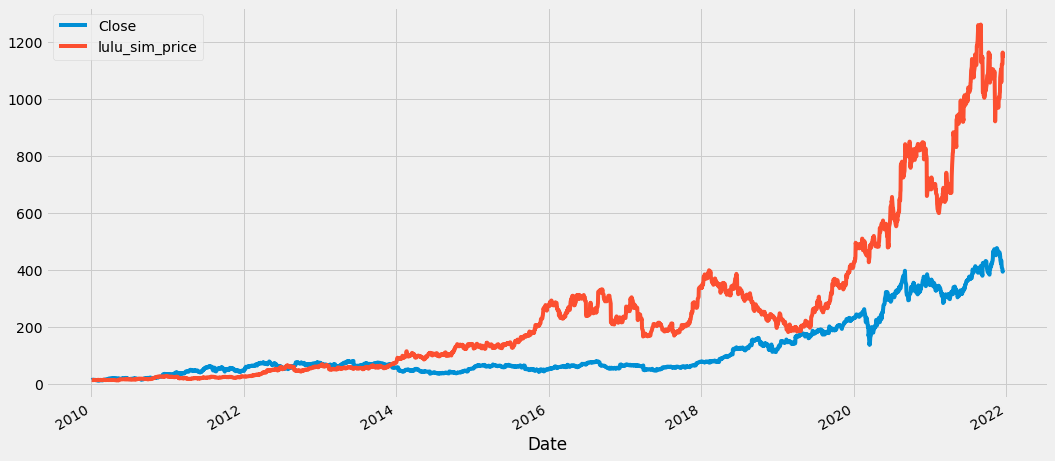

In [92]:
first = lulu['Close'].first('D')
ts_holder = first.append(1 + lulu_simu) #ts_holder time series holder, temp variable holder
ts_holder = ts_holder.cumprod()
ts_holder.index = lulu.index
lulu['lulu_sim_price'] = ts_holder
lulu.plot(figsize=(16, 8), grid=True);plt.show()

## Listings Example

In [93]:
nasdaq = pd.read_excel('listings_info.xlsx', sheet_name='nasdaq', na_values=True)

In [94]:
nasdaq.head()

,Stock Symbol,Company Name,Last Sale,Market Capitalization,IPO Year,Sector,Industry
0,AAPL,Apple Inc.,141.05,7.400245e+11,1980.0,Technology,Computer Manufacturing
1,GOOGL,Alphabet Inc.,840.18,5.809175e+11,NaN,Technology,"Computer Software: Programming, Data Processing"
2,GOOG,Alphabet Inc.,823.56,5.694261e+11,2004.0,Technology,"Computer Software: Programming, Data Processing"
3,MSFT,Microsoft Corporation,64.95,5.019031e+11,1986.0,Technology,Computer Software: Prepackaged Software
4,AMZN,"Amazon.com, Inc.",884.67,4.221385e+11,1997.0,Consumer Services,Catalog/Specialty Distribution


In [95]:
nasdaq.set_index('Stock Symbol', inplace=True)

In [96]:
nasdaq.dropna(subset=['Sector'], inplace=True) # remove companies without sector info

In [97]:
nasdaq['Market Capitalization']/=1e6

In [98]:
nasdaq.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2767 entries, AAPL to ZIONZ
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Company Name           2767 non-null   object 
 1   Last Sale              2764 non-null   float64
 2   Market Capitalization  2767 non-null   float64
 3   IPO Year               1337 non-null   float64
 4   Sector                 2767 non-null   object 
 5   Industry               2767 non-null   object 
dtypes: float64(3), object(3)
memory usage: 151.3+ KB


In [99]:
top_comp = nasdaq.groupby(['Sector'])['Market Capitalization'].nlargest(1).sort_values(ascending=False)
top_comp

Sector                 Stock Symbol
Technology             AAPL            740024.467000
Consumer Services      AMZN            422138.530626
Health Care            AMGN            118927.210535
Consumer Non-Durables  KHC             111367.949216
Miscellaneous          PCLN             85496.045967
Public Utilities       TMUS             52930.713577
Capital Goods          TSLA             49614.832848
Transportation         CSX              43005.669415
Finance                CME              39372.418940
Consumer Durables      CPRT             13620.922869
Energy                 FANG              9468.718827
Basic Industries       STLD              7976.835456
Name: Market Capitalization, dtype: float64

In [100]:
tickers = top_comp.index.get_level_values(1) # use 0, 1...any integer to refer to the level of indices
tickers = tickers.tolist()
tickers

['AAPL',
 'AMZN',
 'AMGN',
 'KHC',
 'PCLN',
 'TMUS',
 'TSLA',
 'CSX',
 'CME',
 'CPRT',
 'FANG',
 'STLD']

In [101]:
columns = ['Company Name', 'Market Capitalization', 'Last Sale']
comp_info = nasdaq.loc[tickers, columns].sort_values(by='Market Capitalization', ascending=False)
comp_info['no_share'] = comp_info['Market Capitalization']/comp_info['Last Sale']
comp_info.dtypes

Company Name              object
Market Capitalization    float64
Last Sale                float64
no_share                 float64
dtype: object

In [102]:
comp_info

,Company Name,Market Capitalization,Last Sale,no_share
Stock Symbol,,,,
AAPL,Apple Inc.,740024.467000,141.05,5246.540000
AMZN,"Amazon.com, Inc.",422138.530626,884.67,477.170618
AMGN,Amgen Inc.,118927.210535,161.61,735.890171
KHC,The Kraft Heinz Company,111367.949216,91.50,1217.136057
PCLN,The Priceline Group Inc.,85496.045967,1738.77,49.170417
TMUS,"T-Mobile US, Inc.",52930.713577,64.04,826.525821
TSLA,"Tesla, Inc.",49614.832848,304.00,163.206687
CSX,CSX Corporation,43005.669415,46.42,926.446993
CME,CME Group Inc.,39372.418940,115.87,339.798213


In [103]:
stocks = pdr.data.DataReader(name=tickers, 
                             data_source='yahoo', 
                             start = '2000-1-1', 
                             end = dt.datetime.today())['Close']

In [104]:
stocks.head()

Symbols,AAPL,AMZN,AMGN,KHC,TMUS,TSLA,CSX,CME,CPRT,FANG,STLD,PCLN
Date,,,,,,,,,,,,
2000-01-03,0.999442,89.3750,62.9375,NaN,NaN,NaN,1.718750,NaN,3.250000,NaN,3.984375,NaN
2000-01-04,0.915179,81.9375,58.1250,NaN,NaN,NaN,1.666667,NaN,2.843750,NaN,3.765625,NaN
2000-01-05,0.928571,69.7500,60.1250,NaN,NaN,NaN,1.701389,NaN,2.822917,NaN,4.046875,NaN
2000-01-06,0.848214,65.5625,61.1250,NaN,NaN,NaN,1.777778,NaN,2.625000,NaN,4.093750,NaN
2000-01-07,0.888393,69.5625,68.0000,NaN,NaN,NaN,1.777778,NaN,2.927083,NaN,4.234375,NaN


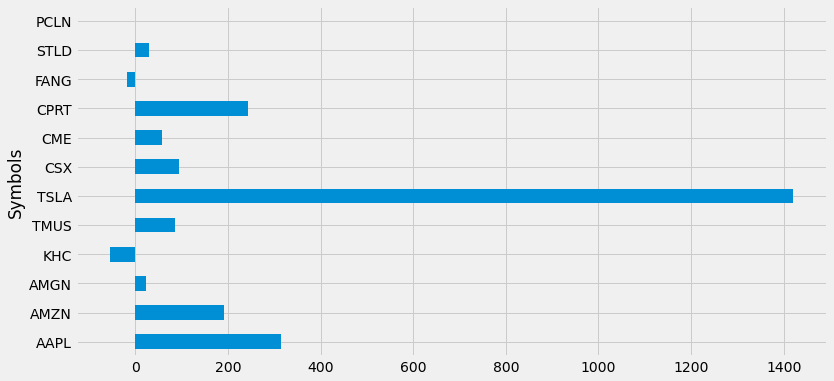

In [105]:
returns = (stocks.iloc[-1]/stocks.loc['2018-1-2']-1)*100
returns.plot(kind='barh', figsize = (12, 6), grid=True)
plt.show()

## Group By Month

In [154]:
stock_index = pdr.data.DataReader(name=['SP500', 'NIKKEI225', 'NASDAQCOM'], data_source='fred', start = '2001-1-1', end = dt.datetime.today())

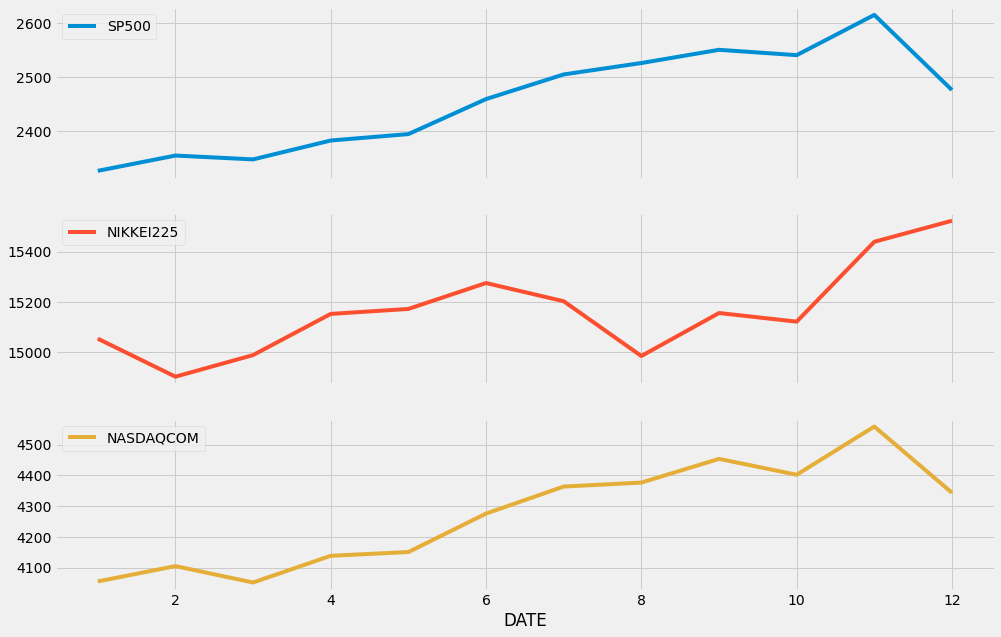

In [130]:
stock_index.groupby(stock_index.index.month).mean().plot(subplots=True, figsize=(15, 10)); plt.show()

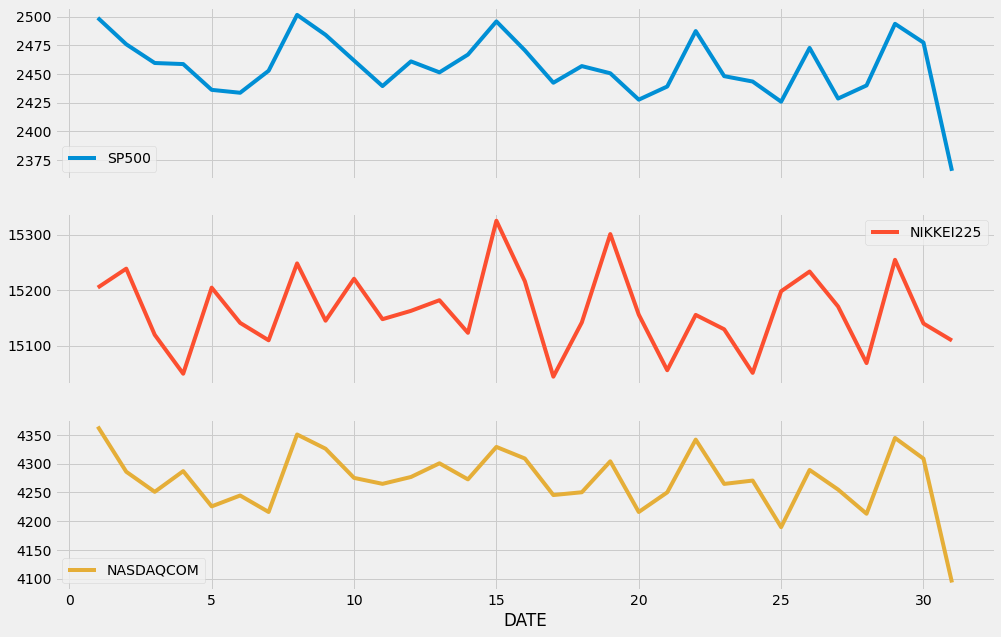

In [131]:
stock_index.groupby(stock_index.index.day).mean().plot(subplots=True, figsize=(15, 10)); plt.show()

## Boxplot

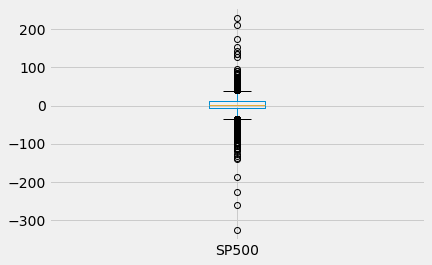

In [139]:
stock_index[['SP500']].diff().boxplot();plt.show()

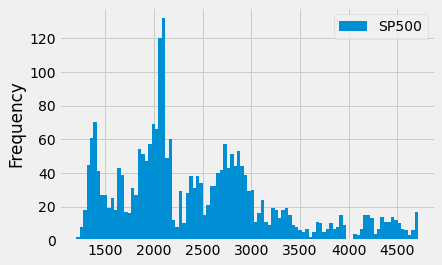

In [140]:
stock_index[['SP500']].plot(kind='hist', bins=100);plt.show()

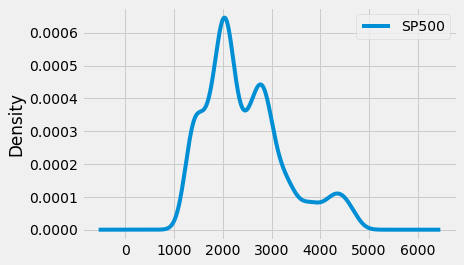

In [141]:
stock_index[['SP500']].plot(kind='density');plt.show()

## Plotting Autocorrelation

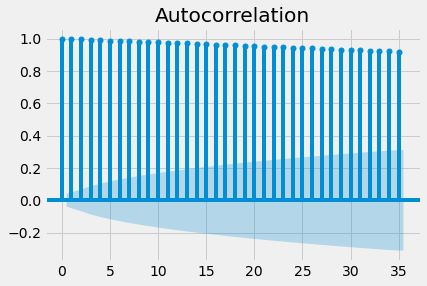

In [152]:
fig = tsaplots.plot_acf(stock_index['SP500'].dropna())

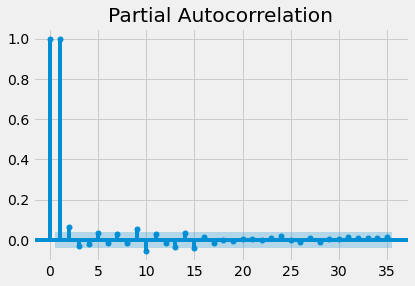

In [153]:
fig = tsaplots.plot_pacf(stock_index['SP500'].dropna())

## Decomposition

In [164]:
tot_constr_China = pdr.data.DataReader(name=['CHNPRCNTO01MLQ'], data_source='fred', start = '2001-1-1', end = dt.datetime.today())

In [165]:
decomp = sm.tsa.seasonal_decompose(tot_constr_China['CHNPRCNTO01MLQ'])

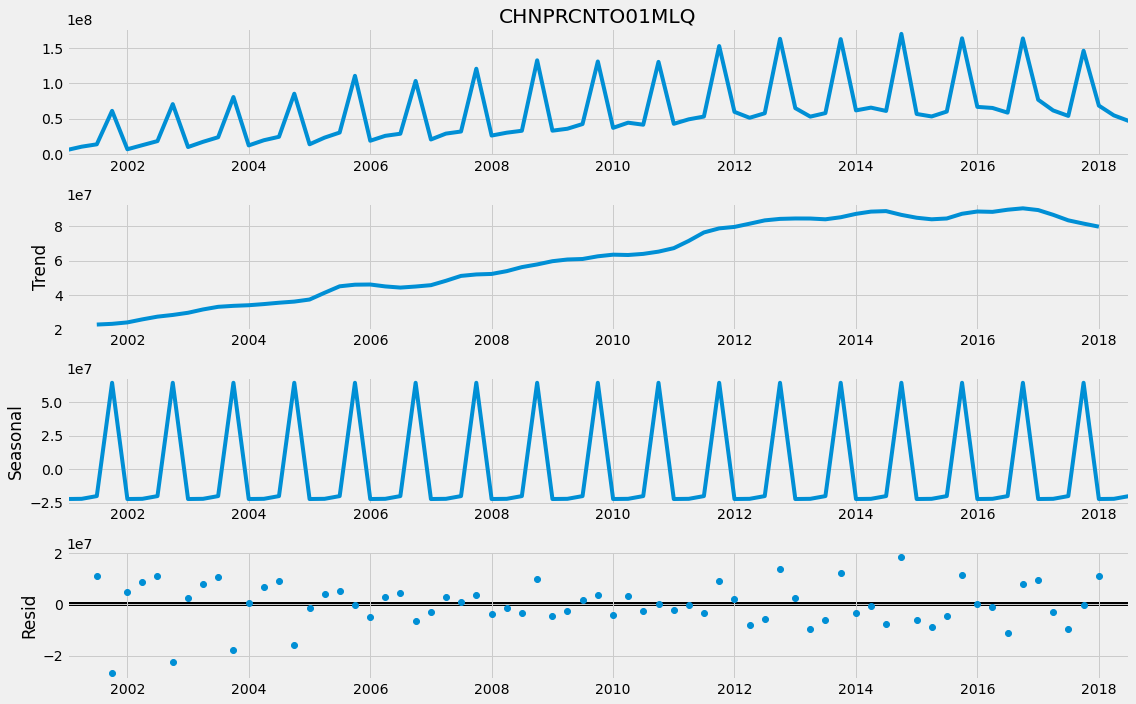

In [177]:
plt.rcParams['figure.figsize'] = 16, 10
fig = decomp.plot()